# Visualizations

### paper
Plot smoothed data (validation accuracy over steps)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
acc_depth = pd.read_csv('outputs/lightning_logs_SplitOnTime_noProc_noSubEmb_b2b_reconn.csv')
acc_sub = pd.read_csv('outputs/lightning_logs_SplitOnTime_noProc_noSubEmb_b2b_reconn-sub.csv')
acc_nob2b = pd.read_csv('outputs/lightning_logs_version_8.csv')
# b2b = pd.read_csv('outputs/lightning_logs_version_2.csv')

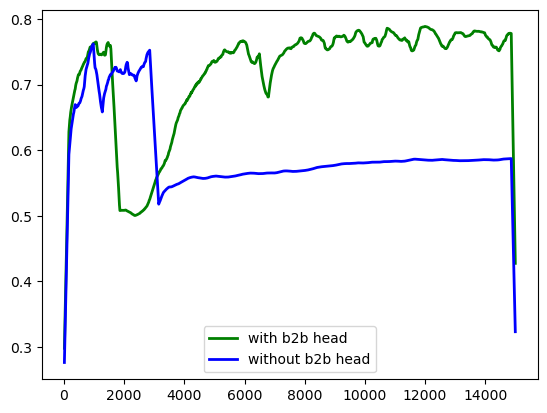

In [15]:
 # Smooth the data
x = acc_depth['Step']
y = acc_depth['Value']

x_ = acc_nob2b['Step']
y_ = acc_nob2b['Value']

 
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# plt.plot(x, y)
plt.plot(x, smooth(y,20), 'g-', lw=2)
plt.plot(x_, smooth(y_,20), 'b-', lw=2)
plt.legend(['with b2b head', 'without b2b head'])
plt.show()

## Poster
### accuracy

In [61]:
val_acc, train_acc = pd.read_csv('outputs/accuracy/val_acc.csv'), pd.read_csv('outputs/accuracy/train_acc.csv')
val_acc_hyp, train_acc_hyp = pd.read_csv('outputs/accuracy/val_acc_hyp.csv'), pd.read_csv('outputs/accuracy/train_acc_hyp.csv')
val_acc_rnd, train_acc_rnd = pd.read_csv('outputs/accuracy/val_acc_random.csv'), pd.read_csv('outputs/accuracy/train_acc_random.csv')
val_acc = val_acc.sort_values(by='Step').query('Step<=17600')
train_acc = train_acc.sort_values(by='Step').query('Step<=17600')

x_v, y_v, x_t, y_t = val_acc['Step'], val_acc['Value'], train_acc['Step'], train_acc['Value']
x_v_hyp, y_v_hyp, x_t_hyp, y_t_hyp = val_acc_hyp['Step'], val_acc_hyp['Value'], train_acc_hyp['Step'], train_acc_hyp['Value']
x_v_rnd, y_v_rnd, x_t_rnd, y_t_rnd = val_acc_rnd['Step'], val_acc_rnd['Value'], train_acc_rnd['Step'], train_acc_rnd['Value']

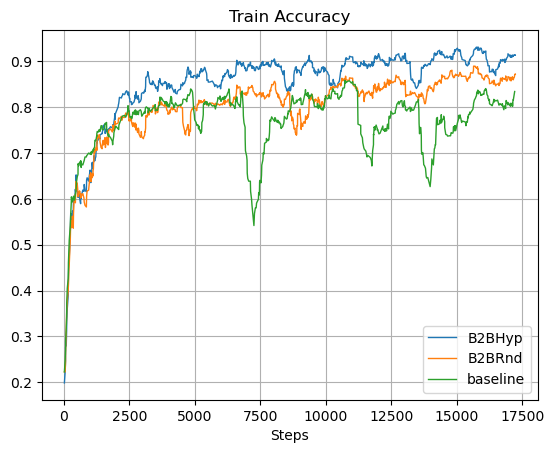

In [69]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

smt = 20
i = 14
lw=1

plt.plot(x_t_rnd[:-i], smooth(y_t_rnd, smt)[:-i], lw=lw)
plt.plot(x_t_hyp[:-i], smooth(y_t_hyp, smt)[:-i], lw=lw)
plt.plot(x_t[:-i], smooth(y_t, smt)[:-i], lw=lw)

plt.legend(['B2BHyp','B2BRnd', 'baseline'])
plt.grid()
plt.xlabel('Steps')
plt.title('Train Accuracy')
plt.show()

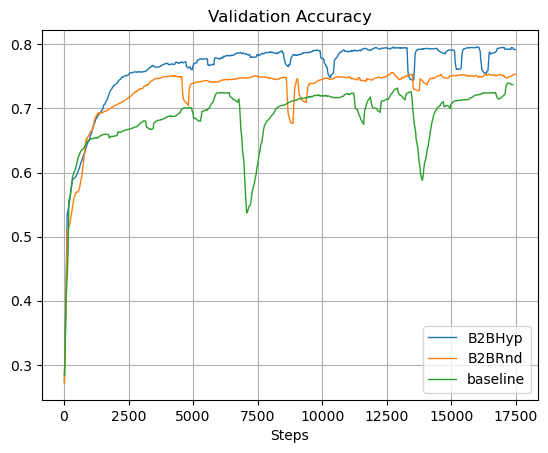

In [71]:
smt = 15
i = 7
lw=1

plt.plot(x_v_rnd[:-i], smooth(y_v_rnd, smt)[:-i], lw=lw)
plt.plot(x_v_hyp[:-i], smooth(y_v_hyp, smt)[:-i], lw=lw)
plt.plot(x_v[:-i], smooth(y_v, smt)[:-i], lw=lw)

plt.legend(['B2BHyp','B2BRnd', 'baseline'])
plt.grid()
plt.xlabel('Steps')
plt.title('Validation Accuracy')
plt.show()